# 1. Introduction 

Collateral Reblance Pool (CRP) dynamically rebalances Collateral to ensure the ayToken minted (i.e. the loan) remains solvent, especially in an adverse market environment (i.e. the value of the loan does not exceed the value of Collateral). This dynamic rebalancing, together with a careful choice of the key parameters (including loan to Loan-to-Value (LTV) and volatility assumption) allows ALEX to eliminate the liquidation needs. Any residual gap risk (which CRP cannot address entirely) is addressed through maintaining a strong reserve fund. When a Borrower mints ayToken by providing appropriate Collateral, the Collateral is converted into a basket of Collateral and Token, with the weights determined by CRP.

In this notebook, we will help you understand the key attributes of the CRP pool by answering: 
1.  How does CRP achieve the dynamic rebalances with weights determined by CRP? 
2.  How does CRP perform in different market environments? 
3.  How does power arbitrageur play a role in the dynamic rebalances and the bring rebate back to the pool.   
3.  In which parameters space (including LTV, volatility assumption, and power arbitrageur functions) and the CRP would maintain a low default risk and a high pool-value level to a collateral ratio (PVTC)?  

Given there is no close form of CPR performance, we use simulation to show the results based on the predicted future scenarios.  


# 2.  CRP performance by Simulations  

In this session, we want to simulate how CRP performs in different market environments.  Basically, a CRP would serve as an agent (bot) response to the actual market environment by updating the pool weight based on current token price $p$, actual price volatility $\eta$, and estimated price volatility $\sigma$.  We simplify the market environment and let the token price change follow a linear growth trend with variation, formally named the Geometric Brownian Motion (https://en.wikipedia.org/wiki/Geometric_Brownian_motion).  By setting up different growth rates $r$ and volatility $\eta$, we can approximately mimic different market environments.  

Two metrics a liquidity provider (LP) would be very interested to know are 1) The final pool value relative to the collatrals, and 2) the risk of default, i.e., when the LtV >1 at any time point.  We can empirically estimate the default risk and PVTC for any given parameters by conducting Monte Carlo simulations. 

For simplicity, token APY are not considered for now.  Specially we are focsuing on the exponential moving avager (EMA) approach.    
 
We set the following initial conditions: 

Initial weights = 50/50

Loan lifetime = 91 days

LTV0 = 80% 

Realized volatility various from 0.5 to 1.5. 

Assume B-S voliatility equals to Realized volatility. 

EMA factor = 0.95. 


## 3.1 Case 1:  In a BTC upward market, with different realized volatiltiy. 

1a | 1b
- | - 
![alt](./figures/pvtc_by_vol_upward.png) | ![alt](./figures/default_by_vol_upward.png)

## 3.2 Case 2:  In a BTC flat market, with different realized volatiltiy. 
2a | 2b
- | - 
![alt](./figures/pvtc_by_vol_flat.png) | ![alt](./figures/default_by_vol_flat.png)

## 3.3 Case 3:  In a BTC downward market, with different realized volatiltiy. 
3a | 3b
- | - 
![alt](./figures/pvtc_by_vol_downward.png) | ![alt](./figures/default_by_vol_downward.png)

## 3.4 Case 4:  Real BTC upward market (2021-01-01 to 2021-03-31), with different realized volatiltiy.   Obersrved realized vol = 0.40
<img src="./figures/animation_2021-01-01_2021-03-31.gif" width="500" align="center">

4a | 4b
- | - 
![alt](./figures/pvtc_by_vol_2021-01-01_2021-03-31.png) | ![alt](./figures/default_by_vol_2021-01-01_2021-03-31.png)



## 3.5 Case 5:  Real BTC downward market (2021-04-01 to 2021-06-30), with different realized volatiltiy.  Obersrved realized vol = 0.65
<img src="./figures/animation_2021-04-01_2021-06-30.gif" width="500" align="center">

5a | 5b
- | - 
![alt](./figures/pvtc_by_vol_2021-04-01_2021-06-30.png) | ![alt](./figures/default_by_vol_2021-04-01_2021-06-30.png)

## 3.6 Case 6:  Real BTC downward market (2021-04-01 to 2021-06-30), with different realized volatiltiy: use factor 0.7 + 50% rebate 
6a | 6b
- | - 
![alt](./figures/pvtc_by_vol_2021-04-01_2021-06-30_rebate.png) | ![alt](./figures/default_by_vol_2021-04-01_2021-06-30_rebate.png)

## 3.7 Case 7:  Real BTC flat market (2020-06-01 to 2020-08-31), with different realized volatiltiy.  Obersrved realized vol = 0.11

<img src="./figures/animation_2020-06-01_2020-08-31.gif" width="500" align="center">


7a | 7b
- | - 
![alt](./figures/pvtc_by_vol_2020-06-01_2020-08-31.png) | ![alt](./figures/default_by_vol_2020-06-01_2020-08-31.png)

In [1]:
# plot of liquity 
import scipy 
import matplotlib.pyplot as plt
import matplotlib.animation
from matplotlib.widgets import Slider
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np 
import random
import pandas as pd 
from ipywidgets import *
from scipy.stats import norm
#Import simulation function and class 
%run rbpool_env_v3.ipynb

In [2]:
# an episode example  
t =  np.linspace(91,0,92)/365
Real_vol = 0.75
Growth_rate = 0
LTV0 = 0.75
bs_vol = 0.75
y_price_init = 50000
y_price_strike = 40000
Collateral = 10000000
pool_init_x = 2500000 
pool_init_y = 150
pool_init_wx = 0.25
fee_rate = 0.0
rebate=0.0
set_random_seed = True  
price_source = [0]
market = 'flat'
example = get_episode_full(t,y_price_init,y_price_strike, bs_vol, Growth_rate, Real_vol, Collateral, LTV0, fee_rate, rebate,
                      pool_init_x, pool_init_y, pool_init_wx, price_source,'SM', 0.95)
example


,t,y_price,weights_ytoken,imp_loss_rebalance,imp_loss_price,x_locked,y_locked,V,coll_with_rebate,rebate,imp_empirical,delta_x,delta_y,ltv_with_rebate,wt_chg,fee,pvtc_rebate,value_loss_rebalance,value_loss_price,value_loss_combined
0,0.249315,50000.000000,0.751661,-0.000007,-6.640723e-08,2.484966e+06,150.300695,1677.044038,1.000634e+07,1.0,1.335245e-06,-15034.101651,0.300695,0.749525,0.251661,0.0,1.000634,-73.673445,-0.664498,6342.778922
1,0.246575,50042.196176,0.753305,-0.000007,-3.591152e-06,2.480088e+06,150.397444,1650.471767,1.005327e+07,1.0,-6.354644e-07,-4878.074164,0.096748,0.746026,0.001644,0.0,1.004479,-72.576769,-36.103069,46922.918402
2,0.243836,50354.432104,0.755145,-0.000009,-5.336428e-04,2.325146e+06,153.576545,1621.247569,9.496012e+06,1.0,-6.467492e-04,-154942.001218,3.179101,0.789805,0.001840,0.0,0.942917,-91.707288,-5067.527683,-557253.230444
3,0.241096,46692.459698,0.753745,-0.000005,-1.348108e-04,2.272409e+06,154.731980,1643.236582,9.227885e+06,1.0,-8.398475e-05,-52736.364870,1.155435,0.812754,-0.001400,0.0,0.988156,-50.241042,-1244.025323,-268127.183589
4,0.238356,44951.766397,0.750663,-0.000026,-3.080604e-05,2.332391e+06,153.398756,1692.555577,9.354381e+06,1.0,-1.136152e-04,59981.322688,-1.333224,0.801763,-0.003082,0.0,1.040491,-235.472192,-288.178671,126495.646671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.010959,46850.709419,0.820601,-0.000233,-6.702369e-05,1.610010e+06,161.989477,844.514184,8.974450e+06,1.0,-5.414871e-04,-117786.161458,2.481256,0.835706,0.008387,0.0,0.957771,-2146.244318,-601.644570,-226419.432966
88,0.008219,45462.459453,0.828188,-0.000198,-3.148305e-04,1.459545e+06,165.320467,787.546269,8.495039e+06,1.0,-9.703441e-04,-150464.270603,3.330991,0.882868,0.007588,0.0,0.934292,-1774.502367,-2675.055650,-479410.857312
89,0.005479,42556.699380,0.830461,-0.000018,-1.771099e-04,1.501824e+06,164.359514,771.451943,8.858284e+06,1.0,-8.614062e-05,42278.902978,-0.960953,0.846665,0.002273,0.0,1.040763,-154.703165,-1568.917394,363245.306841
90,0.002740,44758.344955,0.838839,-0.000253,-2.138866e-04,1.361863e+06,167.477836,714.699517,8.450349e+06,1.0,-9.006905e-04,-139961.291141,3.118322,0.887537,0.008378,0.0,0.943997,-2237.720174,-1807.895021,-407934.816374


In [3]:
# single test 
t =  np.linspace(91,0,92)/365
set_random_seed = False
Growth_rate = 2
fee_rate = 0.00
rebate = 0
s =10
Real_vol = 0.75
bs_vol = 0.75
pool_init_wx = 0.5
fee_rate = 0.0
rebate=0
market = ''
print('LTV0 ={}, bs_vol = {}, Real_vol= {}, and growth_rate ={}'.format(LTV0, bs_vol, Real_vol,Growth_rate))
pd.DataFrame(ltv_simulation(s, 'SM', 0.95)).describe()
#pd.DataFrame(ltv_corr(s, 'SM', 0.95)).describe()

LTV0 =0.75, bs_vol = 0.75, Real_vol= 0.75, and growth_rate =2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1.000000e+01,10.000000,10.0,1.000000e+01,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.0,10.000000,10.000000,10.0,1.000000e+01,10.0,10.000000
mean,1.380782e+07,0.897127,0.0,1.546243e+07,-135037.003096,-106319.884701,4.049175e+06,3.807818e+06,0.005329,0.0,0.978053,0.978053,0.0,-1.654615e+06,0.0,-20.574686
std,3.921705e+06,0.037131,0.0,4.610129e+06,23868.478852,32329.925156,3.923680e+06,3.921705e+06,0.000215,0.0,0.018178,0.018178,0.0,8.538626e+05,0.0,7.426239
min,9.630957e+06,0.850113,0.0,1.027620e+07,-166408.344256,-174056.264483,-1.513912e+05,-3.690426e+05,0.005045,0.0,0.937286,0.937286,0.0,-3.137297e+06,0.0,-29.977350
25%,1.182368e+07,0.869308,0.0,1.273362e+07,-153715.943593,-120747.234670,2.045643e+06,1.823682e+06,0.005240,0.0,0.976208,0.976208,0.0,-2.270234e+06,0.0,-26.138500
50%,1.294382e+07,0.899433,0.0,1.503844e+07,-132778.380000,-106180.016761,3.164365e+06,2.943825e+06,0.005326,0.0,0.984295,0.984295,0.0,-1.715901e+06,0.0,-20.113433
75%,1.488599e+07,0.915114,0.0,1.671955e+07,-122154.848681,-84614.002338,5.133900e+06,4.885994e+06,0.005345,0.0,0.989672,0.989672,0.0,-1.055662e+06,0.0,-16.977247
max,2.348209e+07,0.965174,0.0,2.661938e+07,-93141.789676,-55811.219760,1.370446e+07,1.348209e+07,0.005869,0.0,0.993072,0.993072,0.0,-4.446298e+05,0.0,-6.965190


In [4]:
for factor in [0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1]:
    print(factor)
    k = 0 
    for i in np.append(0.75,np.arange(0.5,2.51,0.1)):
        k += 1
        Real_vol, bs_vol = i,i
        _sm = pd.DataFrame(ltv_simulation(s, 'SM', factor))
        _sm[cha_var] = '{:.2f}'.format(i)
        if k == 1:
            SM = _sm
        else:
            SM = pd.concat([SM, _sm])


0.7


NameError: name 'cha_var' is not defined

In [5]:
set_random_seed = False
np.random.seed(301)
s=10
t =  np.linspace(91,0,92)/365
Growth_rate = 0
fee_rate = 0.00
rebate = 0
# Real_vol = 0.75
# bs_vol = 0.75
pool_init_wx = 0.5
fee_rate = 0.0
factor = 0.95
LTV0 = 0.80
cha_var = 'real_vol'
for gr in np.arange(-2, 2.01, 0.2):
    print(gr)
    Growth_rate = gr
    k = 0 
    for i in np.arange(0.25,2.01,0.25):
        k += 1
        Real_vol, bs_vol = i,i
        _sm = pd.DataFrame(ltv_corr(s, 'SM', factor))
        _sm[cha_var] = '{:.2f}'.format(i)
        if k == 1:
            SM = _sm
        else:
            SM = pd.concat([SM, _sm])
    SM.columns = ['corr_90', 'corr_price_pos', 'corr_price_neg', cha_var]
    A = sim_summary(SM, ['corr_90', cha_var], plot=0)
    A['variable']= 'corr_90'
    B = sim_summary(SM, ['corr_price_pos', cha_var], plot=0)
    B['variable']= 'corr_price_pos'
    C = sim_summary(SM, ['corr_price_neg', cha_var], plot=0)
    C['variable']= 'corr_price_neg'
    
    sim_output = pd.concat([A,B,C]).reset_index().set_index('variable')
    #sim_output.to_csv('corr_vol_{}.csv'.format(round(gr*100)))


-2.0
-1.8
-1.6
-1.4000000000000001
-1.2000000000000002
-1.0000000000000002
-0.8000000000000003
-0.6000000000000003
-0.40000000000000036
-0.2000000000000004
-4.440892098500626e-16
0.1999999999999993
0.39999999999999947
0.5999999999999996
0.7999999999999994
0.9999999999999991
1.1999999999999993
1.3999999999999995
1.5999999999999992
1.799999999999999
1.9999999999999991


In [8]:
dict_LTV0={2.0: 47.0,
 1.5: 59.0,
 1.75: 53.0,
 1.25: 66.0,
 0.75: 79.0,
 1.0: 73.0,
 0.5: 80.0, 
 0.25:80.0}
dict_LTV0[2.0]

47.0

In [15]:
dict_LTV0={2.0: 60.0,
 1.5: 60.0,
 1.75: 60.0,
 1.25: 66.0,
 0.75: 79.0,
 1.0: 73.0,
 0.5: 80.0, 
 0.25:80.0}
dict_LTV0[2.0]

60.0

In [115]:
cha_var

'real_vol'

In [145]:
set_random_seed = False
np.random.seed(101)
s=5000
t =  np.linspace(91,0,92)/365
Growth_rate = 0
fee_rate = 0.00
rebate = 0
fee_rate = 0.0
factor = 0.95
LTV0 = 0.70
cha_var = 'real_vol'
y_price_init = 50000
y_price_srike = 40000
Collateral = 10000000
pool_init_x = 2500000 
pool_init_y = 150
pool_init_wx = 0.25
#stop_limit = 8.4e6
k = 0 
for i in np.arange(0.25,2.01,0.25):
    Real_vol, bs_vol = i,i
    print(i)
    for ltv in [0.7,0.75, 0.8]:
        k += 1
        stop_limit = Collateral*ltv*1.07
        _sm = pd.DataFrame(ltv_simulation_stoploss(s, stop_limit, 'SM', factor))
        _sm['stop_limit'] = stop_limit
        _sm['ltv'] = ltv
        _sm[cha_var] = '{:.2f}'.format(i)
        if k == 1:
            SM = _sm
        else:
            SM = pd.concat([SM, _sm])
        
SM.columns = ['final_pv', 'pv_minus_bnh', 'pool_value_nostop', 'buy_n_hold', 'wt_convert', 'wt_final', 'bnh_default',\
              'time_to_convert', 'stop_loss_flag', 'time_to_liquid','liquid_loss', 'liquid_pv','stop_limit', 'ltv', cha_var, ]
SM.to_csv('SM_flat_{}init.csv'.format(int((1-pool_init_wx)*100)))

# SM['variable'] = SM['final_pv']
# A = sim_summary(SM, ['final_pv', cha_var], plot=1)
# A['variable']= 'pool_value'
# B = sim_summary(SM, ['pv_minus_bnh', cha_var], plot=1)
# B['variable']= 'pv_minus_bnh'
# C1 = sim_summary(SM, ['stop_loss_flag', cha_var], plot=2)
# C1['variable']= 'stop_loss_flag'
# D1 = sim_summary(SM.loc[SM.stop_loss_flag==1], ['time_to_convert', cha_var], plot=2)
# D1['variable']= 'time_to_convert'
# E = sim_summary(SM, ['stop_limit', cha_var], plot=2)
# E['variable']= 'stop_limit'
# C2 = sim_summary(SM, ['liquid_loss', cha_var], plot=2)
# C2['variable']= 'liquid_loss'
# D2 = sim_summary(SM.loc[SM.liquid_loss==1], ['time_to_liquid', cha_var], plot=2)
# D2['variable']= 'time_to_liquid'
# E = sim_summary(SM, ['stop_limit', cha_var], plot=2)
# E['variable']= 'stop_limit'
# F = sim_summary(SM, ['buy_n_hold', cha_var], plot=2)
# F['variable']= 'buy_n_hold'
# G = sim_summary(SM, ['liquid_pv', cha_var], plot=2)
# G['variable']= 'liquid_pv'
# H = sim_summary(SM, ['wt_final', cha_var], plot=2)
# H['variable']= 'wt_final'

# sim_output = pd.concat([A,B,C1,C2,D1,D2,E,F,G,H]).reset_index().set_index('variable')
# sim_output.to_csv('SM_stop_limit_{}_up_75init.csv'.format('107'))


0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0


In [136]:
SM

,final_pv,pv_minus_bnh,pool_value_nostop,buy_n_hold,wt_convert,wt_final,bnh_default,time_to_convert,stop_loss_flag,time_to_liquid,liquid_loss,liquid_pv,stop_limit,ltv,real_vol
0,8.548348e+06,-1.287241e+06,9.467367e+06,9.835590e+06,0.976612,1.000000,0.0,71.0,1.0,-1.0,0.0,9.835590e+06,8560000.0,0.8,0.25
1,9.231132e+06,-2.629617e+05,9.231132e+06,9.494094e+06,0.991368,0.991368,0.0,-1.0,0.0,-1.0,0.0,9.494094e+06,8560000.0,0.8,0.25
2,9.602553e+06,-3.608393e+05,9.602553e+06,9.963392e+06,0.994140,0.994140,0.0,-1.0,0.0,-1.0,0.0,9.963392e+06,8560000.0,0.8,0.25
3,1.189131e+07,-4.354800e+05,1.189131e+07,1.232679e+07,0.995079,0.995079,0.0,-1.0,0.0,-1.0,0.0,1.232679e+07,8560000.0,0.8,0.25
4,9.463601e+06,7.719759e+04,9.463601e+06,9.386403e+06,0.965018,0.965018,0.0,-1.0,0.0,-1.0,0.0,9.386403e+06,8560000.0,0.8,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8.528005e+06,4.618607e+05,7.899824e+06,8.066145e+06,0.981814,1.000000,0.0,79.0,1.0,85.0,1.0,7.648512e+06,8560000.0,0.8,0.25
96,1.021375e+07,3.476529e+04,1.021375e+07,1.017898e+07,0.990844,0.990844,0.0,-1.0,0.0,-1.0,0.0,1.017898e+07,8560000.0,0.8,0.25
97,9.842455e+06,-1.054236e+05,9.842455e+06,9.947879e+06,0.991314,0.991314,0.0,-1.0,0.0,-1.0,0.0,9.947879e+06,8560000.0,0.8,0.25
98,8.556788e+06,-8.119416e+05,9.345605e+06,9.368729e+06,0.921307,1.000000,0.0,54.0,1.0,55.0,1.0,7.627218e+06,8560000.0,0.8,0.25


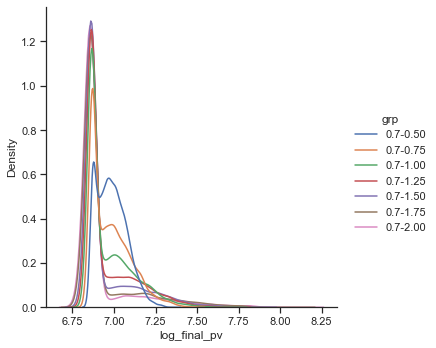

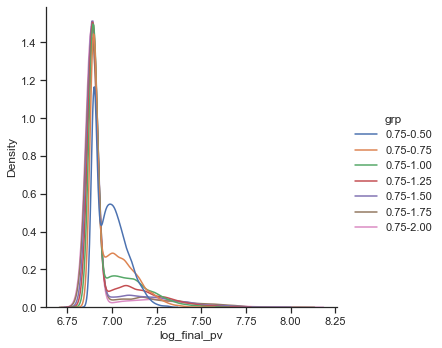

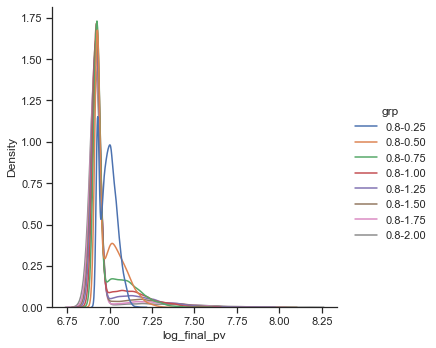

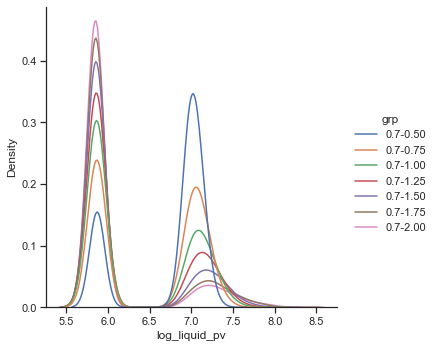

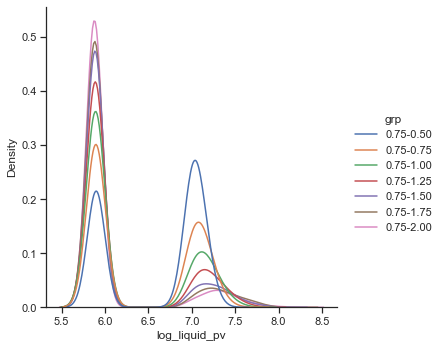

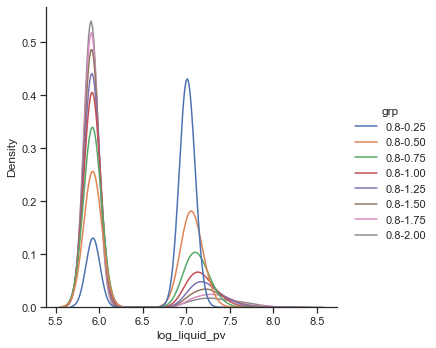

In [97]:
SM = pd.read_csv('SM_flat_50init.csv')
# _df = SM[SM.real_vol=='1.00'][['final_pv', 'buy_n_hold']]
# _df.reset_index(inplace=True)
# _df
# # m = pd.melt(_df, id_vars=['index'], var_name='variable')
# # m.head()
SM['grp'] = SM['stop_limit'].astype(str) + '-'+ SM['real_vol'].astype(str)
SM.head()
SM['log_final_pv'] = np.log10(SM['final_pv'])
SM['log_liquid_pv'] = np.log10(SM['liquid_pv'])

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.displot(SM[SM['stop_limit']==0.7], x="log_final_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.75], x="log_final_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.8], x="log_final_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.7], x="log_liquid_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.75], x="log_liquid_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.8], x="log_liquid_pv", hue="grp", kind="kde", fill=False)

ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_title('Histogram of pool-value (stop-loss at 8.4M ) and buy&hold - real.vol set to 100% ')

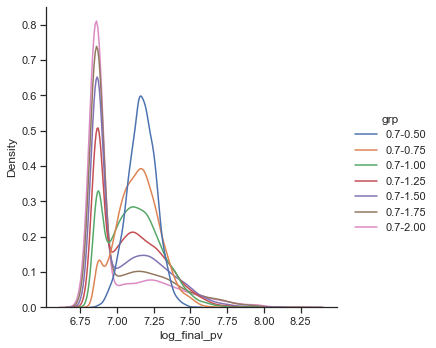

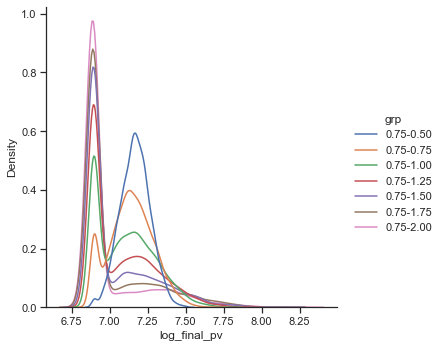

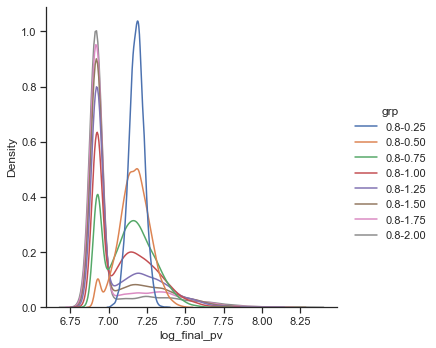

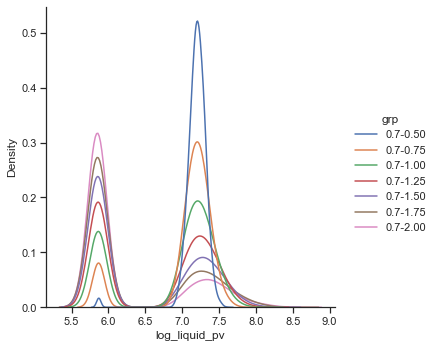

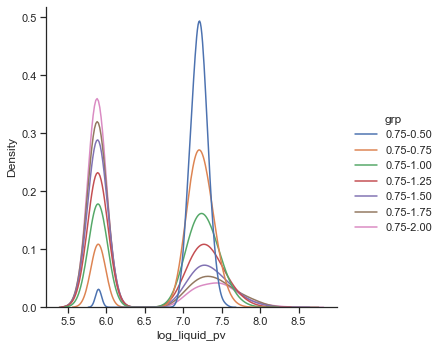

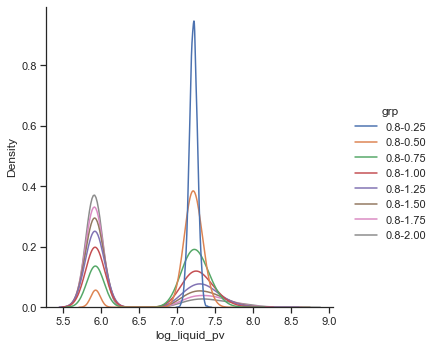

In [83]:
SM['log_final_pv'] = np.log10(SM['final_pv'])
SM['log_liquid_pv'] = np.log10(SM['liquid_pv'])

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.displot(SM[SM['stop_limit']==0.7], x="log_final_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.75], x="log_final_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.8], x="log_final_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.7], x="log_liquid_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.75], x="log_liquid_pv", hue="grp", kind="kde", fill=False)
sns.displot(SM[SM['stop_limit']==0.8], x="log_liquid_pv", hue="grp", kind="kde", fill=False)

ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_title('Histogram of pool-value (stop-loss at 8.4M ) and buy&hold - real.vol set to 100% ')

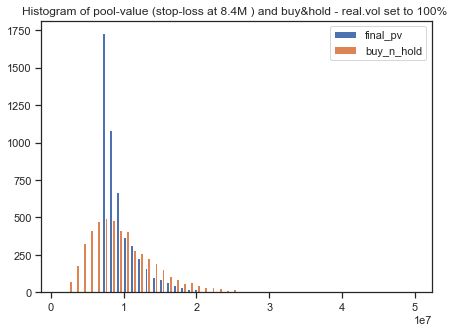

In [11]:
_SM = pd.read_csv('')
_df = SM[SM.real_vol=='1.00'][['final_pv', 'buy_n_hold']]
_df.reset_index(inplace=True)
_df
m = pd.melt(_df, id_vars=['index'], var_name='variable')
m.head()
# df = _df.melt(['target'], var_name='cols',  value_name='vals')

# df.head()
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
bins = np.linspace(1e6, 50e6, 51)
x = _df['final_pv']
y = _df['buy_n_hold']
plt.hist([x, y] , bins, label=['final_pv', 'buy_n_hold'])
plt.legend(loc='upper right')
ax.set_title('Histogram of pool-value (stop-loss at 8.4M ) and buy&hold - real.vol set to 100% ')
plt.show()

# sns.despine(f)

# sns.histplot(
#     m,
#     x="value", hue="variable",
#     multiple="stack",
#     palette="light:m_r",
#     edgecolor=".3",
#     linewidth=.5,
#     log_scale=False,
# )
# # ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_title('Histogram of pool-value (stop-loss at 8.4M ) and buy&hold - real.vol set to 100% ')

<AxesSubplot:xlabel='pv_minus_bnh', ylabel='Count'>

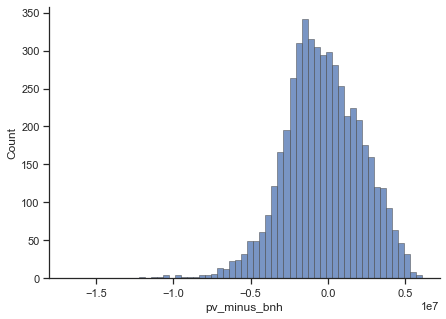

In [13]:

_df1 = SM[SM.real_vol=='1.00'][['pv_minus_bnh']]

sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    _df1,
    x="pv_minus_bnh",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.set_title('Histogram of pool-value (stop-loss at 8.4M ) and buy&hold - real.vol set to 100% ')

In [69]:
set_random_seed = False
np.random.seed(301)
s=1000
t =  np.linspace(91,0,92)/365
Growth_rate = 0
fee_rate = 0.00
rebate = 0
# Real_vol = 0.75
# bs_vol = 0.75
pool_init_wx = 0.5
fee_rate = 0.0
factor = 0.95
LTV0 = 0.75
cha_var = 'real_vol'
for gr in np.arange(-2, 2.01, 0.2):
    print(gr)
    Growth_rate = gr
    k = 0 
    for i in np.arange(0.25,2.01,0.25):
        k += 1
        Real_vol, bs_vol = i,i
        _sm = pd.DataFrame(ltv_simulation(s, 'SM', factor))
        _sm[cha_var] = '{:.2f}'.format(i)
        if k == 1:
            SM = _sm
        else:
            SM = pd.concat([SM, _sm])
    SM.columns = ['pool_value', 'pvtc', 'default', 'portfolio', 'imp_weight', 'imp_price', 'PNL_price',\
                  'total_pnl','mean_abs_wt_change','loss_at_default', 'wt_default', 'wt_final','default_at_maturity',\
                  'pv_minus_bnh','bnh_default', 'pv_minus_bnh_btc', cha_var]
    SM['loss_at_maturity'] = SM['pool_value']-Collateral*LTV0
    A = sim_summary(SM, ['pool_value', cha_var], plot=0)
    A['variable']= 'pool_value'
    B = sim_summary(SM, ['pvtc', cha_var], plot=0)
    B['variable']= 'pvtc'
    C = sim_summary(SM, ['default', cha_var], plot=0)
    C['variable']= 'default_anytime'
    C2 = sim_summary(SM, ['default_at_maturity', cha_var], plot=0)
    C2['variable']= 'default_at_maturity'
    D = sim_summary(SM, ['imp_weight', cha_var], plot=0) 
    D['variable']= 'IL_from_weight'
    E = sim_summary(SM, ['imp_price', cha_var], plot=0) 
    E['variable']= 'IL_from_price' 
    F = sim_summary(SM, ['total_pnl', cha_var], plot=0) 
    F['variable'] = 'total_pnl'
    G = sim_summary(SM.loc[SM.default==1], ['loss_at_default', cha_var],plot=0)
    G['variable'] = 'loss_at_default'
    G2 = sim_summary(SM.loc[SM.default_at_maturity==1], ['loss_at_maturity', cha_var],plot=0)
    G2['variable'] = 'loss_at_maturity'
    H = sim_summary(SM, ['mean_abs_wt_change', cha_var],plot=0)
    H['variable'] = 'mean_abs_wt_change'
    I = sim_summary(SM, ['portfolio', cha_var], plot=0) 
    I['variable'] = 'BuynHold'
    J = sim_summary(SM.loc[SM.default==1], ['wt_default', cha_var], plot=0, label='0.75') 
    J['variable'] = 'BTC_wt_default'
    K = sim_summary(SM, ['wt_final', cha_var], plot=0, label='0.75' ) 
    K['variable'] = 'BTC_wt_final'
    L = sim_summary(SM, ['pv_minus_bnh', cha_var], plot=0, label='0.75' ) 
    L['variable'] = 'pv_minus_bnh'
    M = sim_summary(SM, ['bnh_default', cha_var], plot=0, label='0.75' ) 
    M['variable'] = 'bnh_default'
    N = sim_summary(SM, ['pv_minus_bnh_btc', cha_var], plot=0, label='0.75' ) 
    N['variable'] = 'pv_minus_bnh_btc'

    
    sim_output = pd.concat([A,B,C,C2,D,E,F,G,G2, H,I,J, K,L,M,N]).reset_index().set_index('variable')
    sim_output.to_csv('SM_gr_vol_{}.csv'.format(round(gr*100)))

# # post simulation process 
# import pandas as pd
# import sys
# import os

# #file_list[0].split('.')[0].split('_')[3]
# # ['SM_{}_up.csv'.format(int(i*100)) for i in np.arange(0,1.01,0.1)]
# # file_list= ['SM_rep{}.csv'.format(int(i)) for i in np.arange(0,10,1)] 
# file_list = ['SM_factor_95_down.csv', 'SM_factor_95_flat.csv', 'SM_factor_95_up.csv']
# writer = pd.ExcelWriter('Simulation_check_wt.xlsx') # Arbitrary output name
# for csvfilename in file_list:
#     _market =csvfilename.split('.')[0].split('_')[3]
#     df = pd.read_csv(csvfilename)
#     df.to_excel(writer,sheet_name=os.path.splitext(csvfilename)[0])
#     workbook = writer.book 
#     worksheet = writer.sheets[os.path.splitext(csvfilename)[0]]
#     worksheet.insert_image('B15', 'wt_final_by_real_vol_0.75_{}.png'.format(_market))
#     worksheet.insert_image('B50', 'wt_default_by_real_vol_0.75_{}.png'.format(_market))

# writer.save()   


# import xlsxwriter
# # Create an new Excel file and add a worksheet.
# workbook = xlsxwriter.Workbook('Simulation_check_wt.xlsx')
# worksheet = workbook.add_worksheet()
# worksheet.insert_image('SM_factor_95_down_wt_final', 'wt_final_by_real_vol_0.75_down.png')
# workbook.close()

-2.0
-1.8
-1.6
-1.4000000000000001
-1.2000000000000002
-1.0000000000000002
-0.8000000000000003
-0.6000000000000003
-0.40000000000000036
-0.2000000000000004
-4.440892098500626e-16
0.1999999999999993
0.39999999999999947
0.5999999999999996
0.7999999999999994
0.9999999999999991
1.1999999999999993
1.3999999999999995
1.5999999999999992
1.799999999999999
1.9999999999999991


In [ ]:
import pandas as pd
import sys
import os

file_list= ['SM_95.csv', 'SM_90.csv', 'SM_70.csv','SM_95_down.csv', 'SM_90_down.csv', 'SM_70_down.csv' ]

writer = pd.ExcelWriter('Simulation_by_rebate.xlsx') # Arbitrary output name
for csvfilename in file_list:
    df = pd.read_csv(csvfilename)
    df.to_excel(writer,sheet_name=os.path.splitext(csvfilename)[0])
    result = pd.concat(frames)
writer.save()

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#SM.para_value= le.fit_transform(SM.para.values)
SM['para_value']=le.fit_transform(SM.para.values)
labels = SM[['para','para_value']].drop_duplicates().para.values
SM.columns = ['loss', 'V', 'pctc', 'default', 'para', 'para_value']
def plot_boxplt(df, cols, labels=''):
    import matplotlib.pyplot as plt
    import numpy as np
    
    _mean = df.groupby(cols[1]).mean().reset_index()
    _std = df.groupby(cols[1]).std().reset_index()
    fig, ax = plt.subplots(figsize=(8,6))
    ax.errorbar(_mean[cols[1]], _mean[cols[0]], _std[cols[0]], linestyle='None', marker='^')
    ax.set_xlabel(cols[1])
    ax.set_ylabel(cols[0])
    ax.set_title('{} by {}'.format(cols[0], cols[1]))
    plt.show()
plot_boxplt(SM, ['V', 'para_value'], labels)